In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/train.csv')
test_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/test.csv')
sub_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/sample_submission.csv')

In [3]:
train_df.shape,test_df.shape

((233154, 41), (112392, 40))

In [4]:
train_df['is_train'] = ''
test_df['is_train'] = ''
data = pd.DataFrame()
train_df.loc[:,'is_train'] = 1
test_df.loc[:,'is_train'] = 0
data = data.append(train_df,sort=False).append(test_df,sort=False)

In [5]:
data.reset_index(inplace=True)

In [6]:
#Treat missing values
#86 % values are no so it is safe to impute NO
data['Employment.Type'].fillna('Self employed',inplace=True)

In [7]:
data.apply(lambda x: sum(x.isnull()),axis=0)

index                                       0
UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION     

In [8]:
data.shape,train_df.shape,test_df.shape

((345546, 43), (233154, 42), (112392, 41))

In [9]:
#create mean and st dev features- leakage features
ft_name = ['loan_default']
var = ['branch_id','State_ID']
fntouse = list([np.mean,np.sum])

# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for fn2use in fntouse:
        for var_name in var:
            temp3 = train_df.pivot_table(values=ftname,index=[var_name],aggfunc=fn2use)
            # temp2.plot(kind='bar')
            temp3.reset_index(inplace=True)
            temp3.columns = [var_name, var_name+'_'+ftname+'_'+str(fn2use).split(' ')[1]]
            data = data.merge(temp3,on=var_name, how = 'left')
    #         data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

            # df = pd.concat([temp2,temp3],axis=1)

In [10]:
data.apply(lambda x: sum(x.isnull()),axis=0)

index                                       0
UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION     

In [ ]:
data.columns

In [11]:
data['CREDIT.HISTORY.LENGTH.YEARS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[0][:-3]))

In [12]:
data['CREDIT.HISTORY.LENGTH.MONTHS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[1][:-3]))

In [13]:
data['CREDIT.HISTORY.LENGTH.TOTMONS'] = data['CREDIT.HISTORY.LENGTH.MONTHS'] + np.dot(data['CREDIT.HISTORY.LENGTH.YEARS'],12)

In [14]:
data['AVERAGE.ACCT.AGE.YEARS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[0][:-3]))

data['AVERAGE.ACCT.AGE.MONTHS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[1][:-3]))

data['AVERAGE.ACCT.AGE.TOTMONS'] = data['AVERAGE.ACCT.AGE.MONTHS'] + np.dot(data['AVERAGE.ACCT.AGE.YEARS'],12)

In [15]:
data['Date.of.Birth'][0]

'01-01-84'

In [16]:
data['Date.of.Birth.YEAR'] = data['Date.of.Birth'].map(lambda x : int(x.split('-')[2]))

In [17]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth'].head()

874     16-07-00
1300    05-03-00
1864    01-01-00
1872    18-08-00
1874    01-01-00
Name: Date.of.Birth, dtype: object

In [18]:
data['Date.of.Birth.YEAR.conv'] = ''

In [19]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth.YEAR.conv'] = 2000

In [20]:
data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR.conv'] = data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR']+1900

In [21]:
data['Date.of.Birth.AGE'] = ''

data['Date.of.Birth.AGE'] = 2019 - data.loc[:,'Date.of.Birth.YEAR.conv']

In [ ]:
#st dev and mean of ltv feature

In [ ]:
temp2 = data.pivot_table(values='loan_default',index=['branch_id'],aggfunc=np.mean)
# print('Frequency Table for Credit History:') 
# print(temp2)

# fig = plt.figure(figsize=(8,4))
# ax1 = fig.add_subplot(121)
# ax1.set_xlabel('Credit_History')
# ax1.set_ylabel('Count of Applicants')
# ax1.set_title("Applicants by Credit_History")
temp2.plot(kind='bar')



In [22]:
#create mean and st dev features


ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT']


#All 208 features - aggregated

# ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',
#            'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
#        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
#        'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
#        'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
#        'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
#        'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',]


    
var = ['Current_pincode_ID','branch_id','supplier_id','manufacturer_id','State_ID','Employee_code_ID']
# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for var_name in var:
        temp3 = data.pivot_table(values=ftname,index=[var_name],aggfunc=np.mean)
        # temp2.plot(kind='bar')
        temp3.reset_index(inplace=True)
        temp3.columns = [var_name, var_name+'_'+ftname+'_mean']
        data = data.merge(temp3,on=var_name, how = 'left')
        data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

        # df = pd.concat([temp2,temp3],axis=1)

In [ ]:
# data = data.merge(temp3,on='Current_pincode_ID', how = 'left')

In [ ]:
# data['ltv_stdev'] = data['ltv']-data['ltv_mean']

In [23]:
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace(' ', '_', regex=True)

In [24]:
#treat categorical variables
from sklearn.preprocessing import OneHotEncoder

d = pd.DataFrame()

var_mod = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

x = pd.get_dummies(data[var_mod])

data  = data.drop(var_mod,axis=1)
data = pd.concat([data,x], axis=1)
    
# for i in var_mod:
#     print(i)
# #     d[str(i)] 
#     dd = le.fit_transform(data.loc[:,i]).toarray()
#     print(dd.shape)
# d.dtypes


In [25]:
data.shape

(345546, 112)

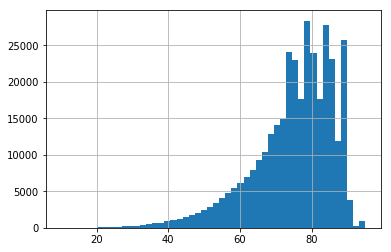

In [26]:
data['ltv'].hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**2).hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**1/3).hist(bins=50)
plt.show()

In [27]:
data['log_disbursed_amount'] = np.log(data['disbursed_amount'])
data['log_asset_cost'] = np.log(data['asset_cost'])

In [28]:
data['ltv_squared'] = data['ltv']**2
data['log_ltv'] = np.log(data['ltv'])

In [29]:
data['DisbursalDate_month'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[1]))
data['DisbursalDate_dayofmonth'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[0]))

In [ ]:
type(data['AVERAGE.ACCT.AGE'][0])

In [ ]:
type(data['CREDIT.HISTORY.LENGTH'][0])

In [30]:
train_df = data.loc[data['is_train']==1,:]
train_df = train_df.drop(['is_train'],axis=1)

In [31]:
test_df = data.loc[data['is_train']==0,:]
test_df = test_df.drop(['is_train','loan_default'],axis=1)

In [32]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

index                                                                                    0
UniqueID                                                                                 0
disbursed_amount                                                                         0
asset_cost                                                                               0
ltv                                                                                      0
branch_id                                                                                0
supplier_id                                                                              0
manufacturer_id                                                                          0
Current_pincode_ID                                                                       0
Date.of.Birth                                                                            0
DisbursalDate                                                                            0

In [ ]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

In [33]:
train_df.shape,test_df.shape

((233154, 117), (112392, 116))

In [34]:
list(train_df.columns)

['index',
 'UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Date.of.Birth',
 'DisbursalDate',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'loan_default',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS',
 

In [38]:
predictors = [
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS',
 'CREDIT.HISTORY.LENGTH.TOTMONS',
 'AVERAGE.ACCT.AGE.YEARS',
 'AVERAGE.ACCT.AGE.MONTHS',
 'AVERAGE.ACCT.AGE.TOTMONS',
 'Date.of.Birth.YEAR',
 'Date.of.Birth.YEAR.conv',
 'Date.of.Birth.AGE',
 'Current_pincode_ID_disbursed_amount_mean',
 'Current_pincode_ID_stdev',
 'branch_id_disbursed_amount_mean',
 'branch_id_stdev',
 'supplier_id_disbursed_amount_mean',
 'supplier_id_stdev',
 'manufacturer_id_disbursed_amount_mean',
 'manufacturer_id_stdev',
 'State_ID_disbursed_amount_mean',
 'State_ID_stdev',
 'Employee_code_ID_disbursed_amount_mean',
 'Employee_code_ID_stdev',
 'Current_pincode_ID_asset_cost_mean',
 'branch_id_asset_cost_mean',
 'supplier_id_asset_cost_mean',
 'manufacturer_id_asset_cost_mean',
 'State_ID_asset_cost_mean',
 'Employee_code_ID_asset_cost_mean',
 'Current_pincode_ID_ltv_mean',
 'branch_id_ltv_mean',
 'supplier_id_ltv_mean',
 'manufacturer_id_ltv_mean',
 'State_ID_ltv_mean',
 'Employee_code_ID_ltv_mean',
 'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
 'branch_id_PERFORM_CNS.SCORE_mean',
 'supplier_id_PERFORM_CNS.SCORE_mean',
 'manufacturer_id_PERFORM_CNS.SCORE_mean',
 'State_ID_PERFORM_CNS.SCORE_mean',
 'Employee_code_ID_PERFORM_CNS.SCORE_mean',
 'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
 'branch_id_PRIMARY.INSTAL.AMT_mean',
 'supplier_id_PRIMARY.INSTAL.AMT_mean',
 'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
 'State_ID_PRIMARY.INSTAL.AMT_mean',
 'Employee_code_ID_PRIMARY.INSTAL.AMT_mean',
 'Employment.Type_Salaried',
 'Employment.Type_Self employed',
 'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
 'log_disbursed_amount',
 'log_asset_cost',
 'ltv_squared',
 'log_ltv',
 'DisbursalDate_month',
 'DisbursalDate_dayofmonth']

In [36]:

##Single best model predictors



# predictors = ['disbursed_amount', 'asset_cost', 'ltv',
#        'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
#        'State_ID', 'Employee_code_ID',
#        'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
#        'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
#        'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
#        'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
#        'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
#        'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
#        'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
#        'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
#        'CREDIT.HISTORY.LENGTH.YEARS', 'CREDIT.HISTORY.LENGTH.MONTHS',
#        'CREDIT.HISTORY.LENGTH.TOTMONS', 'AVERAGE.ACCT.AGE.YEARS',
#        'AVERAGE.ACCT.AGE.MONTHS', 'AVERAGE.ACCT.AGE.TOTMONS',
#        'Date.of.Birth.YEAR', 'Date.of.Birth.YEAR.conv', 'Date.of.Birth.AGE',
#        'Employment.Type_Salaried', 'Employment.Type_Self employed',
#        'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
#        'log_disbursed_amount', 'log_asset_cost', 'DisbursalDate_month',
#        'DisbursalDate_dayofmonth','Current_pincode_ID_disbursed_amount_mean',
#  'Current_pincode_ID_stdev',
#  'branch_id_disbursed_amount_mean',
#  'branch_id_stdev',
#  'supplier_id_disbursed_amount_mean',
#  'supplier_id_stdev',
#  'manufacturer_id_disbursed_amount_mean',
#  'manufacturer_id_stdev',
#  'State_ID_disbursed_amount_mean',
#  'State_ID_stdev',
#  'Employee_code_ID_disbursed_amount_mean',
#  'Employee_code_ID_stdev',
#  'Current_pincode_ID_asset_cost_mean',
#  'branch_id_asset_cost_mean',
#  'supplier_id_asset_cost_mean',
#  'manufacturer_id_asset_cost_mean',
#  'State_ID_asset_cost_mean',
#  'Employee_code_ID_asset_cost_mean',
#  'Current_pincode_ID_ltv_mean',
#  'branch_id_ltv_mean',
#  'supplier_id_ltv_mean',
#  'manufacturer_id_ltv_mean',
#  'State_ID_ltv_mean',
#  'Employee_code_ID_ltv_mean',
#  'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
#  'branch_id_PERFORM_CNS.SCORE_mean',
#  'supplier_id_PERFORM_CNS.SCORE_mean',
#  'manufacturer_id_PERFORM_CNS.SCORE_mean',
#  'State_ID_PERFORM_CNS.SCORE_mean',
#  'Employee_code_ID_PERFORM_CNS.SCORE_mean',
#  'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
#  'branch_id_PRIMARY.INSTAL.AMT_mean',
#  'supplier_id_PRIMARY.INSTAL.AMT_mean',
#  'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
#  'State_ID_PRIMARY.INSTAL.AMT_mean',
#  'Employee_code_ID_PRIMARY.INSTAL.AMT_mean','branch_id_loan_default_mean',
#        'State_ID_loan_default_mean', 'branch_id_loan_default_sum',
#        'State_ID_loan_default_sum','ltv_squared','log_ltv']


outcome = ['loan_default']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(train_df[predictors], train_df[outcome], test_size=0.3, random_state=1234)

In [40]:
X_train.shape,X_validation.shape

((163207, 110), (69947, 110))

In [41]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [ ]:

alg = XGBClassifier()

In [ ]:
#kf = loo.split(X_train_std[predictor_var])
kf = KFold(n_splits=10).split(X_train[['State_ID','branch_id']])
# ['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID']
error = []
# yavg = pd.DataFrame()

for train, test in kf:
    # Filter training data
    print("training stared")
    train_predictors = X_train[predictors].iloc[train,:]

    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train].values

    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    y1 = alg.predict(X_train[predictors].iloc[test,:])
#     yavg = yavg.append(pd.Series(y1),ignore_index=True)

    #Record error from each cross-validation run
    error.append(metrics.roc_auc_score(y_train.iloc[test], y1))
    print('score for current fold',metrics.roc_auc_score(y_train.iloc[test], y1))
    print("training finished")
print ("Cross-Validation AUC Score : %f" % np.mean(error))


In [42]:
def modelfit(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
    sub_df['loan_default']= dtrain_predprob1
    sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')  
  

In [43]:
def modelfit_mod(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
#     sub_df['loan_default']= dtrain_predprob1
#     sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')  
  

[0]	train-auc:0.610541+0.000759099	test-auc:0.608001+0.000770768
[1]	train-auc:0.616707+0.00308687	test-auc:0.614294+0.00301279
[2]	train-auc:0.621948+0.00171709	test-auc:0.618501+0.0015573
[3]	train-auc:0.625117+0.00132889	test-auc:0.622304+0.000774875
[4]	train-auc:0.626773+0.00111993	test-auc:0.623818+0.00148455
[5]	train-auc:0.629158+0.00098187	test-auc:0.626304+0.00187701
[6]	train-auc:0.63008+0.000691722	test-auc:0.627567+0.00184645
[7]	train-auc:0.633112+0.000862982	test-auc:0.630159+0.00183385
[8]	train-auc:0.634534+0.00070832	test-auc:0.631273+0.00171884
[9]	train-auc:0.635772+0.000536233	test-auc:0.632467+0.0014084
[10]	train-auc:0.636994+0.000579151	test-auc:0.633637+0.000922018
[11]	train-auc:0.63804+0.000501377	test-auc:0.634479+0.000924505
[12]	train-auc:0.639134+0.000417817	test-auc:0.635352+0.00106833
[13]	train-auc:0.640158+0.000440898	test-auc:0.635976+0.00102493
[14]	train-auc:0.641281+0.000425281	test-auc:0.636981+0.00101497
[15]	train-auc:0.642283+0.000370615	test-

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7835
AUC Score (Train): 0.669649
CPU times: user 3min 31s, sys: 576 ms, total: 3min 32s
Wall time: 3min 32s


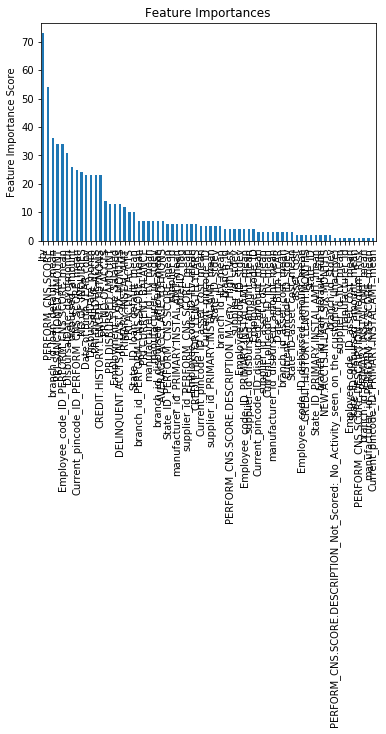

In [44]:
%%time
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [45]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier()

modelfit_mod(model6, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':



Model Report
Accuracy : 0.7695
AUC Score (Train): 0.593768


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=29, learning_rate=0.1, random_state=0)

modelfit_mod(ada, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time

from sklearn.ensemble import VotingClassifier

model9 = VotingClassifier(estimators=[('RF', model6),('Xgb', XGBClassifier()), ('adaboost', ada)], voting='soft')

modelfit_mod(model9, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [74]:
# Feature Importance
from sklearn import datasets
# from sklearn import metrics
# from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
# dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = RandomForestClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[0.02925127 0.02730224 0.02881618 0.00599948 0.01695355 0.00359568
 0.0203659  0.00401371 0.020462   0.         0.00268597 0.00206016
 0.00296389 0.00130153 0.0001674  0.01418885 0.00714467 0.00493279
 0.00324162 0.010136   0.00944844 0.00990672 0.0008397  0.00063635
 0.00027269 0.00064048 0.00067902 0.00061723 0.00696423 0.00053233
 0.00357864 0.00292299 0.00585124 0.01074502 0.0031601  0.00622633
 0.00286684 0.00487877 0.00711018 0.00938159 0.00359786 0.00735275
 0.00956697 0.02313191 0.02421325 0.02293236 0.02227557 0.0226645
 0.00551727 0.01056846 0.01523803 0.01764297 0.00366104 0.0097817
 0.002722   0.00869108 0.01840836 0.01976626 0.02097248 0.00563704
 0.01531755 0.00375137 0.00270313 0.01877708 0.02261929 0.00600917
 0.01617205 0.00359627 0.0029012  0.01855887 0.02437174 0.00644394
 0.01679827 0.00358928 0.00367282 0.0214244  0.02179862 0.00591904
 0.01532389 0.00372086 0.00258543 0.01844453 0.00394531 0.00379004
 0.00079826 0.00061095 0.0008355  0.00064315 0.00066928 0.000791

In [75]:
fimp = pd.Series(X_train.columns)

d = pd.concat([fimp,pd.Series(model.feature_importances_)],axis=1)

In [76]:
df = d.sort_values(by=1,ascending=False).reset_index().drop(['index'],axis=1)

In [77]:
df.columns = ['ftname','ftimp']

Text(0, 0.5, 'Feature Importance Score')

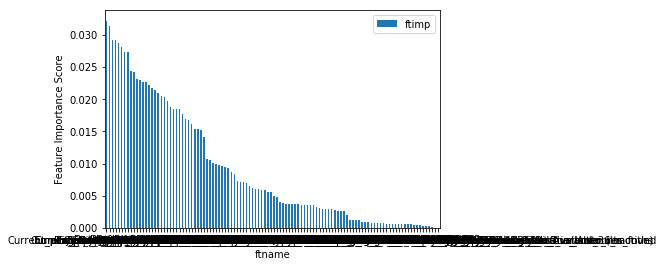

In [85]:
# df.iloc[:20,:].plot(kind='bar', title='Feature Importances')

ax = df.plot.bar(x='ftname', y='ftimp', rot=0)

plt.ylabel('Feature Importance Score')  

In [78]:
toptfs = list(df.loc[df['ftimp']>0.01,:]['ftname'])

In [79]:
toptfs

['log_ltv',
 'ltv_squared',
 'disbursed_amount',
 'log_disbursed_amount',
 'ltv',
 'DisbursalDate_dayofmonth',
 'asset_cost',
 'log_asset_cost',
 'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
 'Date.of.Birth.YEAR.conv',
 'Date.of.Birth.YEAR',
 'Date.of.Birth.AGE',
 'Current_pincode_ID_stdev',
 'Current_pincode_ID_ltv_mean',
 'Current_pincode_ID_disbursed_amount_mean',
 'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
 'Employee_code_ID_PERFORM_CNS.SCORE_mean',
 'Current_pincode_ID_asset_cost_mean',
 'Employee_code_ID',
 'Current_pincode_ID',
 'Employee_code_ID_stdev',
 'Employee_code_ID_asset_cost_mean',
 'Employee_code_ID_ltv_mean',
 'Employee_code_ID_PRIMARY.INSTAL.AMT_mean',
 'Employee_code_ID_disbursed_amount_mean',
 'supplier_id_stdev',
 'supplier_id',
 'supplier_id_PERFORM_CNS.SCORE_mean',
 'supplier_id_ltv_mean',
 'supplier_id_PRIMARY.INSTAL.AMT_mean',
 'supplier_id_asset_cost_mean',
 'supplier_id_disbursed_amount_mean',
 'PERFORM_CNS.SCORE',
 'branch_id_loan_default_mean',
 'branch

[0]	train-auc:0.610541+0.000759099	test-auc:0.608001+0.000770768
[1]	train-auc:0.616707+0.00308687	test-auc:0.614294+0.00301279
[2]	train-auc:0.621779+0.00156168	test-auc:0.618441+0.00149912
[3]	train-auc:0.624924+0.00139854	test-auc:0.622116+0.000625399
[4]	train-auc:0.62609+0.00141622	test-auc:0.62322+0.00136825
[5]	train-auc:0.62822+0.000961964	test-auc:0.62546+0.00147935
[6]	train-auc:0.628898+0.000697655	test-auc:0.626441+0.00148372
[7]	train-auc:0.631288+0.000772138	test-auc:0.62852+0.00151351
[8]	train-auc:0.632323+0.00089204	test-auc:0.629304+0.00189371
[9]	train-auc:0.632952+0.000552828	test-auc:0.629697+0.00194227
[10]	train-auc:0.633501+0.000903961	test-auc:0.630182+0.00194765
[11]	train-auc:0.634791+0.000675269	test-auc:0.63138+0.00170863
[12]	train-auc:0.635353+0.000524404	test-auc:0.631814+0.00184489
[13]	train-auc:0.636095+0.000761605	test-auc:0.632237+0.0018816
[14]	train-auc:0.636819+0.000599476	test-auc:0.632852+0.00154934
[15]	train-auc:0.637276+0.000643437	test-auc:

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7834
AUC Score (Train): 0.656826


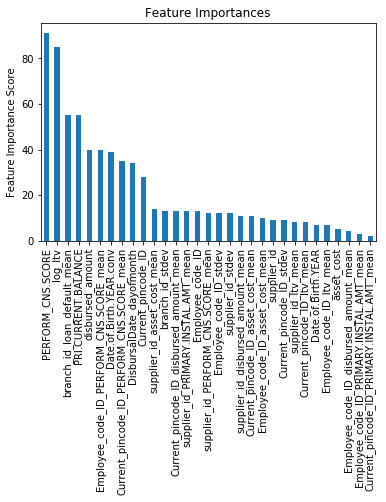

In [80]:
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,toptfs,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [71]:
model1 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

[0]	train-auc:0.629448+0.00165395	test-auc:0.621804+0.00121316
[1]	train-auc:0.641992+0.00132029	test-auc:0.633017+0.00138346
[2]	train-auc:0.646683+0.00140449	test-auc:0.636866+0.00189979
[3]	train-auc:0.65132+0.000808481	test-auc:0.640912+0.00199978
[4]	train-auc:0.654844+0.00101138	test-auc:0.643123+0.00216226
[5]	train-auc:0.657219+0.000376911	test-auc:0.644814+0.00196798
[6]	train-auc:0.65992+0.000271909	test-auc:0.646878+0.00208534
[7]	train-auc:0.662603+0.000576103	test-auc:0.648755+0.00200092
[8]	train-auc:0.66437+0.000290649	test-auc:0.649851+0.00202759
[9]	train-auc:0.66635+0.000686449	test-auc:0.650872+0.00184098
[10]	train-auc:0.66823+0.000809655	test-auc:0.651763+0.00185042
[11]	train-auc:0.670446+0.000903604	test-auc:0.653121+0.00195462
[12]	train-auc:0.672351+0.00084121	test-auc:0.654326+0.0018915
[13]	train-auc:0.674195+0.000679994	test-auc:0.655347+0.00172615
[14]	train-auc:0.676084+0.000752696	test-auc:0.656682+0.00185213
[15]	train-auc:0.677902+0.000896081	test-auc:0

[127]	train-auc:0.750652+0.000898343	test-auc:0.669282+0.00266616
[128]	train-auc:0.751066+0.000904387	test-auc:0.669285+0.00265228
[129]	train-auc:0.751491+0.00100092	test-auc:0.669259+0.00265042
[130]	train-auc:0.751842+0.000957869	test-auc:0.669331+0.00264109
[131]	train-auc:0.752348+0.000922824	test-auc:0.669427+0.00264667
[132]	train-auc:0.752775+0.000880384	test-auc:0.669411+0.00258828
[133]	train-auc:0.753254+0.000932177	test-auc:0.669317+0.00267013
[134]	train-auc:0.753683+0.0010153	test-auc:0.669362+0.00260221
[135]	train-auc:0.754074+0.00101053	test-auc:0.669437+0.00260468
[136]	train-auc:0.754494+0.00108063	test-auc:0.66934+0.00258569
[137]	train-auc:0.754908+0.00105393	test-auc:0.669361+0.00255954
[138]	train-auc:0.75534+0.00103216	test-auc:0.669282+0.00264076
[139]	train-auc:0.755688+0.00106624	test-auc:0.669258+0.00266004
[140]	train-auc:0.756194+0.0010003	test-auc:0.669166+0.0026422
[141]	train-auc:0.756645+0.00101669	test-auc:0.669088+0.00267321
[142]	train-auc:0.75699+

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7834
AUC Score (Train): 0.674916
CPU times: user 7min 1s, sys: 596 ms, total: 7min 2s
Wall time: 7min 2s


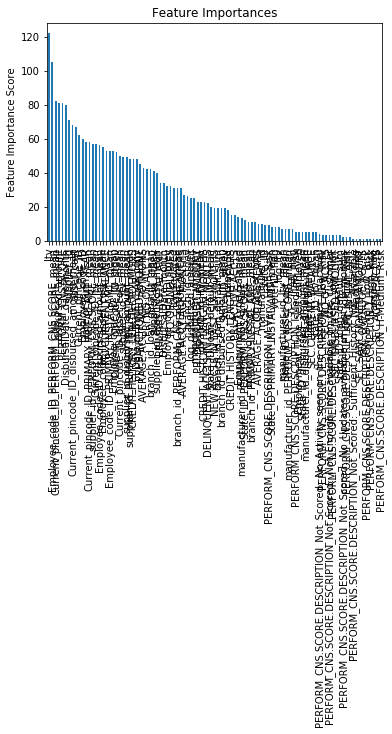

In [72]:
%%time
#replce top_20_ft with predictors to run model on all the features
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

[0]	train-auc:0.618627+0.00284239	test-auc:0.610394+0.00363036
[1]	train-auc:0.630994+0.0013796	test-auc:0.621662+0.00136544
[2]	train-auc:0.635263+0.00145172	test-auc:0.625071+0.00186937
[3]	train-auc:0.638169+0.000943085	test-auc:0.626899+0.00176297
[4]	train-auc:0.6405+0.00105193	test-auc:0.628752+0.00187617
[5]	train-auc:0.642725+0.000920735	test-auc:0.630069+0.00132282
[6]	train-auc:0.644391+0.000732707	test-auc:0.631183+0.00140595
[7]	train-auc:0.64607+0.000413525	test-auc:0.632377+0.00153286
[8]	train-auc:0.647659+0.000493018	test-auc:0.633135+0.00133288
[9]	train-auc:0.649664+0.000272342	test-auc:0.634478+0.00138979
[10]	train-auc:0.651191+0.000142335	test-auc:0.634834+0.00110034
[11]	train-auc:0.652907+0.000597578	test-auc:0.635682+0.00128498
[12]	train-auc:0.65433+0.000645502	test-auc:0.636299+0.00121799
[13]	train-auc:0.655963+0.000569946	test-auc:0.637329+0.000969044
[14]	train-auc:0.657385+0.000690994	test-auc:0.637868+0.00106565
[15]	train-auc:0.658886+0.000819334	test-au

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7834
AUC Score (Train): 0.653918
CPU times: user 2min 35s, sys: 184 ms, total: 2min 35s
Wall time: 2min 35s


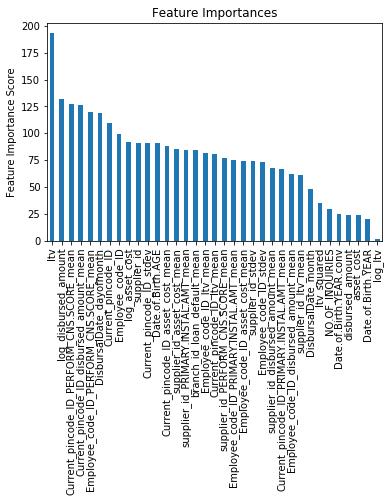

In [73]:
%%time
#replce top_20_ft with predictors to run model on all the features
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,toptfs,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
top_20_features = pd.Series(model1.get_booster().get_fscore()).sort_values(ascending=False)[:25]

In [ ]:
top_20_ft = list(top_20_features.index)

In [ ]:
top_20_ft

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.metrics import roc_curve, auc
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Performance(model1,y_validation,X_validation)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
%%time
np.linspace(0,1,11)

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='roc_auc',cv=5).mean()

param_space = {
    'learning_rate': hp.choice('learning_rate', [0.1,0.1]),#np.linspace(0,1,11)),
    
    'n_estimators': hp.choice('n_estimators', [300,300]),
    
    'max_depth': hp.choice('max_depth', [3, 5, 7, 9]), #range(1,20)),
                               
    'min_child_weight': hp.choice('min_child_weight', [1, 3, 5]), #range(1,7)),
    
    'gamma': hp.choice('gamma', [0,0]),#np.linspace(0,1,11)),
    
    'subsample': hp.choice('subsample', [0.8,0.8]),#np.linspace(0,1,11)),
    
    'colsample_bytree': hp.choice('colsample_bytree',[0.8,0.8])# np.linspace(0,1,11)),
    
#     'max_features': hp.choice('max_features', range(1,55)),
    
#     'criterion': hp.choice('criterion', ["gini", "entropy"])
#                        
     }

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=5, trials=trials)
print ('best:')
print (best)


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [ ]:
%%time
param_test1 = {
 'max_depth':[3, 5, 7],
 'min_child_weight':[1, 3, 5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)


In [ ]:
param_test1 = {
 'max_depth':[3, 5, 7],
 'min_child_weight':[1, 3, 5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)


In [ ]:
gsearch1.best_params_

In [ ]:
gsearch1.best_score_

In [ ]:
param_test2 = {
 'max_depth':[4, 5, 6],
 'min_child_weight':[4,5,6]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

print(gsearch1.best_params_, gsearch1.best_score_)

In [ ]:
param_test2b = {
 'min_child_weight':[5,6,7,8,9]
}

gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=118, max_depth=6,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch2b.fit(X_train,y_train)

print(gsearch2b.best_params_, gsearch2b.best_score_)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

print(gsearch3.best_params_, gsearch3.best_score_)


In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=8,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
modelfit(xgb1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

print(gsearch4.best_params_, gsearch4.best_score_)


In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(X_train,y_train)
print(gsearch5.best_params_, gsearch5.best_score_)


In [ ]:
# param_test6 = {
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# }

# gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
#  min_child_weight=8, gamma=0, subsample=0.95, colsample_bytree=0.7,
#  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# gsearch6.fit(X_train,y_train)


# print(gsearch6.best_params_, gsearch6.best_score_)

In [ ]:
# param_test7 = {
#  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.09]
# }

# gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
#  min_child_weight=8, gamma=0.1,subsample=0.95, colsample_bytree=0.7,
#  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
#  param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch7.fit(X_train,y_train)

# print(gsearch7.best_params_, gsearch7.best_score_)


In [ ]:
xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=8,
 gamma=0,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)


In [ ]:
modelfit(xgb4, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)